## Crime Data Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("crime_data.csv")

In [5]:
df=df.drop(columns=["Unnamed: 0"],axis=1)

In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [17]:
df.shape

(50, 4)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [19]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
#Checking CoRelation 
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [12]:
df[df.corr()>80].sum() # No High Correlation Found between Features

Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

In [13]:
#Checking CoRelation  using Spearman Rank 
df.corr(method ='spearman')

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.817274,0.106716,0.679427
Assault,0.817274,1.000000,0.275213,0.714368
UrbanPop,0.106716,0.275213,1.000000,0.438107
Rape,0.679427,0.714368,0.438107,1.000000


In [14]:
df[df.corr()>80].sum() # No correation Found

Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

<AxesSubplot:>

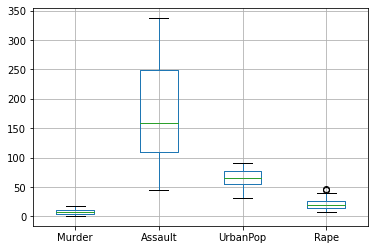

In [15]:
df.boxplot()

In [22]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
aggscaled=sc.fit_transform(df)
aggscaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

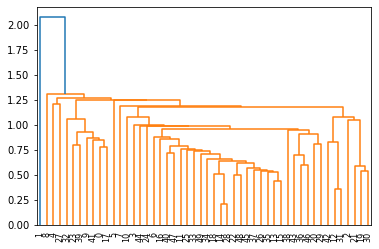

In [23]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(aggscaled, method='single'))

In [31]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [32]:
# save clusters for chart
y_hc = hc.fit_predict(aggscaled)
y_hc

array([4, 3, 0, 0, 1, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
from sklearn.metrics import silhouette_score
silhouette_score(aggscaled,y_hc)

0.21127138005172738

In [60]:
# create clusters with 2
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

# save clusters for chart
y_hc = hc.fit_predict(aggscaled)
y_hc

silhouette_score(aggscaled,y_hc)

0.23455598753159795

## Kmeans Clustering

In [61]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
kmeans_scaled=sc.fit_transform(df)
kmeans_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

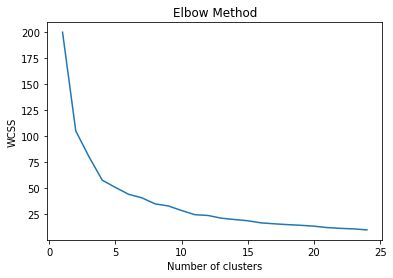

In [68]:
# Finding optimum K value
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(kmeans_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 25), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
#Build Cluster algorithm

kmeans_cluster = KMeans(11, random_state=42)
kmeans_cluster.fit(kmeans_scaled)

KMeans(n_clusters=11, random_state=42)

In [72]:
kmeans_cluster.labels_

array([ 4,  6,  1,  0,  2,  2, 10,  0,  1,  4, 10,  3,  9,  0,  3,  0,  0,
        4,  3,  1,  7,  1, 10,  5,  8,  0,  0,  2,  3,  7,  1,  9,  5,  3,
        8,  0,  8, 10,  7,  5,  3,  4,  9,  7,  3,  0,  8,  3, 10,  0])

In [73]:
# Adding Kmeans prdicted labels to original dataframe


df["Kmeans_labels"] =kmeans_cluster.labels_

In [74]:
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_labels
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,6
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [76]:
silhouette_score(kmeans_scaled,kmeans_cluster.labels_)

0.26493570475748723

In [ ]:
kmeans()

In [78]:
from sklearn.model_selection import GridSearchCV

params={'n_clusters':[1,2,3,4,5,9,6,7,8,9,10,11,12,13,14,15]
         }

grid=GridSearchCV(kmeans,param_grid=params,cv=5,scoring='accuracy')
grid.fit(kmeans_scaled)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=24, random_state=0),
             param_grid={'n_clusters': [1, 2, 3, 4, 5, 9, 6, 7, 8, 9, 10, 11,
                                        12, 13, 14, 15]},
             scoring='accuracy')

In [79]:
grid.best_params_

{'n_clusters': 1}

In [113]:
kmeans_cluster = KMeans(2, random_state=42)
kmeans_cluster.fit(kmeans_scaled)
kmeans_cluster.labels_
print("silhouette_score With 2 Clusters:-",silhouette_score(kmeans_scaled,kmeans_cluster.labels_)

SyntaxError: unexpected EOF while parsing (1549115660.py, line 4)

## DBscan

In [114]:
df.head()

,Murder,Assault,UrbanPop,Rape,Kmeans_labels
0,13.2,236,58,21.2,4
1,10.0,263,48,44.5,6
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2


In [116]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
dbscan_scaled=sc.fit_transform(df)
dbscan_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -0.0526064 ],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.53190914],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626, -0.9293797 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -1.22163747],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.63712193],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.63712193],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319,  1.70094021],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -1.22163747],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 , -0.9293797 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.0526064 ],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  1.70094021],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.34486417],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.40868244],
       [-0.13637203, -0.70012057, -0.0

In [117]:
db=DBSCAN()
db.fit_predict(dbscan_scaled)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [118]:
from sklearn.model_selection import GridSearchCV

params={'eps':[1,2,3,4,5,6,7,8,9,10],
         'min_samples': [1,2,3,4,5,6,7,8,9,10]
     }

grid=GridSearchCV(DBSCAN(),param_grid=params,cv=5,scoring='accuracy')
grid.fit(dbscan_scaled)

GridSearchCV(cv=5, estimator=DBSCAN(),
             param_grid={'eps': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [119]:
grid.best_params_

{'eps': 1, 'min_samples': 1}

In [121]:
db=DBSCAN(eps= 1,min_samples=1)
y_pred=db.fit_predict(dbscan_scaled)
y_pred

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  0,  9, 10, 11, 12, 10, 12, 12,
        0, 10, 13,  6, 13,  6,  0, 14, 12, 12, 15, 10,  6, 13, 11, 16, 10,
        6, 12,  6,  6,  6,  0, 10,  0, 11,  6, 10, 12,  6, 10,  6, 12],
      dtype=int64)

In [122]:
silhouette_score(dbscan_scaled,y_pred)

0.174714431305716

In [129]:
# Adding prediction of dbscan to original dataframe


df["Dbscan_cluster"]=y_pred

In [137]:
df.head()


,Murder,Assault,UrbanPop,Rape,Kmeans_labels,Dbscan_cluster
0,13.2,236,58,21.2,4,0
1,10.0,263,48,44.5,6,1
2,8.1,294,80,31.0,1,2
3,8.8,190,50,19.5,0,3
4,9.0,276,91,40.6,2,4


In [136]:
df.groupby('Dbscan_cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,Kmeans_labels
Dbscan_cluster,,,,,
0,14.9500,237.000000,55.833333,22.616667,4.333333
1,10.0000,263.000000,48.000000,44.500000,6.000000
2,8.1000,294.000000,80.000000,31.000000,1.000000
3,8.8000,190.000000,50.000000,19.500000,0.000000
4,9.0000,276.000000,91.000000,40.600000,2.000000
5,7.9000,204.000000,78.000000,38.700000,2.000000
6,4.5000,124.272727,76.090909,17.718182,8.363636
7,5.9000,238.000000,72.000000,15.800000,0.000000
8,15.4000,335.000000,80.000000,31.900000,1.000000


# Outcomes

Cluster 8 has highest Murder cases

Cluster 1 has highest rape cases

Cluster 1 has highest assault cases

Cluster 4 has highest UrbanPop cases


Cluster 1 is the Place to be Avoided For Staying..

Cluster 10 is the safest place to stay..